In [1]:
library(extrafont)
library(tidyverse)
library(epidemia)
library(arrow)
library(zoo)

Registering fonts with R

── Attaching core tidyverse packages ───────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘arrow’


The following object is masked from ‘package:lubridate’:

    duration


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




# 1. parameters

In [2]:
T0 = 40

## observation parameters

In [3]:
alpha = 0.01

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [4]:
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

$$I_{-T_0} = \mu_0$$

# 2. load data

In [5]:
data <- read_feather('data/CovidCastStateAdj_2.feather')

In [6]:
data = (data 
        %>% transmute(
            region = geo_value,
            date = date(time_value),
            deaths = as.integer(pmax(data$deaths, 0)),
            intervention = full_time_work_prop) 
        %>% group_by(region)
        %>% filter(max(deaths) > 20)
        %>% filter(date > date[which(cumsum(deaths) > 10)[1]] - 30))

In [7]:
data = data %>% mutate(iv_ma7 = rollmean(x = intervention, 7, fill=NA))

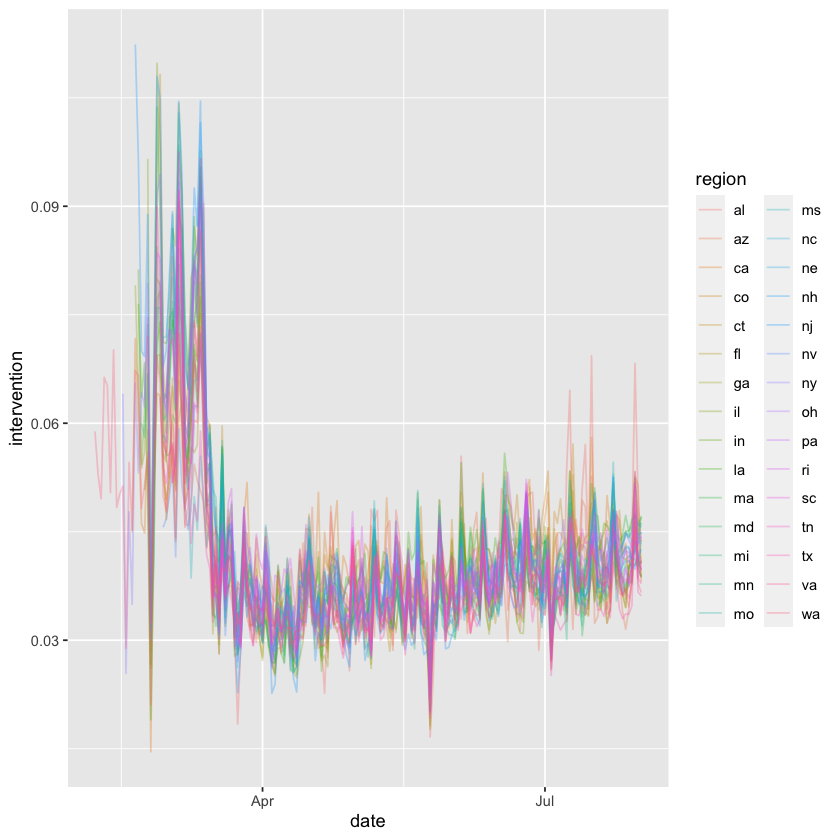

In [8]:
ggplot(data) + geom_line(aes(date, intervention, group = region, color = region), alpha = 0.3) 

Warning message:
“Removed 180 rows containing missing values (`geom_line()`).”


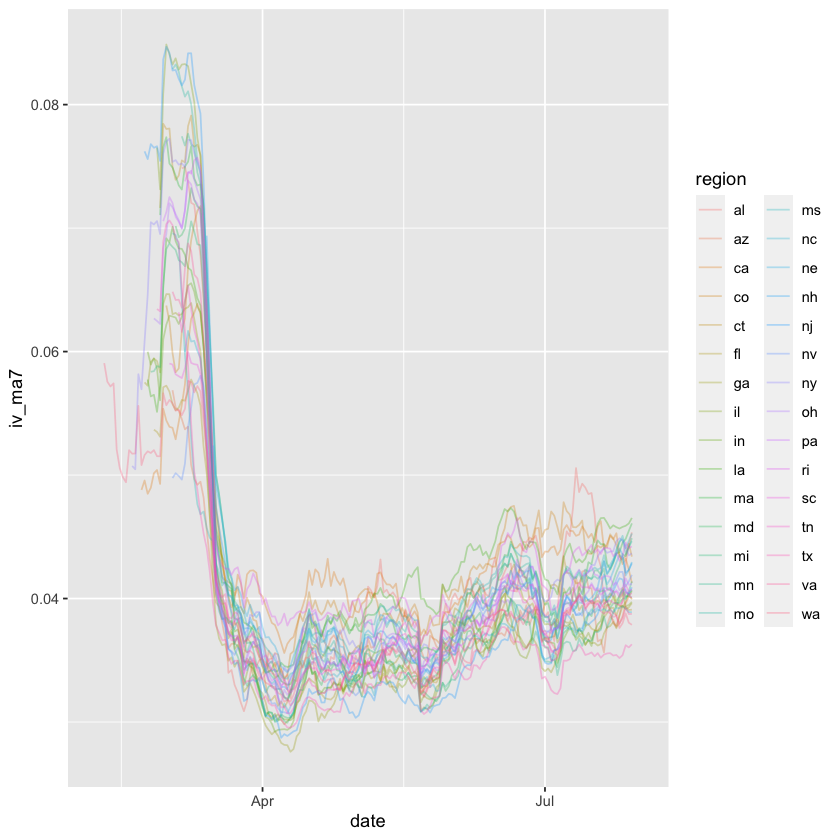

In [9]:
ggplot(data) + geom_line(aes(date, iv_ma7, group = region, color = region), alpha = 0.3) 

In [10]:
data = data %>% group_modify(~ {
    data.frame(date = c(min(.x$date)+(-T0:-1), .x$date),
               deaths = c(rep(NA,T0), .x$deaths),
               intervention = c(rep(0,T0), .x$intervention * (-20) + 1.6))}
)

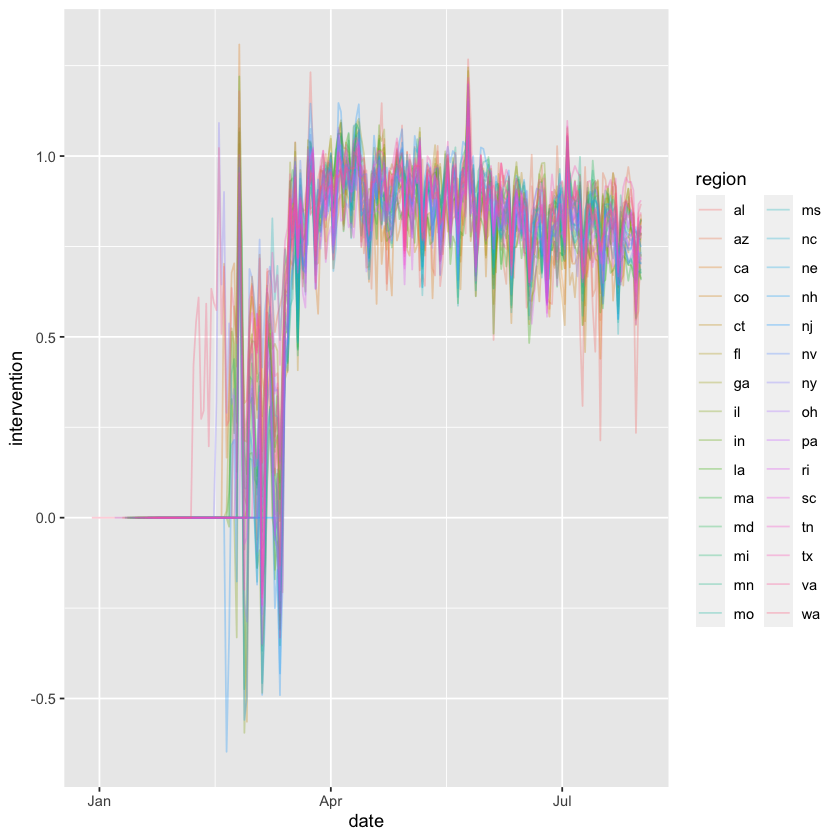

In [11]:
ggplot(data) + geom_line(aes(date, intervention, group = region, color = region), alpha = 0.3) 

In [12]:
data

region,date,deaths,intervention
<chr>,<date>,<int>,<dbl>
al,2020-01-23,NA,0
al,2020-01-24,NA,0
al,2020-01-25,NA,0
al,2020-01-26,NA,0
al,2020-01-27,NA,0
al,2020-01-28,NA,0
al,2020-01-29,NA,0
al,2020-01-30,NA,0
al,2020-01-31,NA,0


In [13]:
regions = unique(data$region)

# 3. fit

In [20]:
rt <- epirt(formula = R(region, date) ~ 1 + intervention,
            prior_intercept = normal(0, 4),
            prior = normal(0, 4),
            prior_covariance = decov(shape = c(1, 1), scale = 8),
            link = scaled_logit(6.5))

In [21]:
inf <- epiinf(gen = EuropeCovid$si, seed_days = T0)

In [22]:
deaths <- epiobs(formula = deaths ~ 1, i2o = EuropeCovid2$inf2death,
                 prior_intercept = normal(0, 0.01), link = scaled_logit(2*alpha))

Warning message:
“i2o does not sum to one. Please ensure this is intentional.”


In [23]:
results = array(0, c(length(regions), 12))
colnames(results)=c('th[0]','th[1]','th[2]',
                    'V[0,0]','V[1,0]','V[2,0]',
                    'V[0,1]','V[1,1]','V[2,1]',
                    'V[0,2]','V[1,2]','V[2,2]')

In [24]:
for(iter_sim in 1:length(regions)){
    start_sim = proc.time()[3]
    
    data_i = data %>% filter(region == regions[iter_sim])
    
    args <- list(rt = rt, inf = inf, obs = deaths, data = data_i, 
                 seed=12345, refresh=0)
    args$algorithm <- "fullrank"; args$iter <- 5e4; args$tol_rel_obj <- 1e-3
    
    fm <- do.call(epim, args)
    
    ths_smp = data.frame(log(as.data.frame(fm$stanfit)[4]),
                         as.data.frame(fm$stanfit)[1],
                         as.data.frame(fm$stanfit)[2])
    
    results[iter_sim,1:3] = colMeans(ths_smp)
    results[iter_sim,4:12] = cov(ths_smp)
    
    print(paste0("region ",regions[iter_sim]," finished, ",
                 proc.time()[3] - start_sim," sec."))
    flush(stdout())
}

Warning message:
“Pareto k diagnostic value is 0.74. Resampling is unreliable. Increasing the number of draws or decreasing tol_rel_obj may help.”


[1] "region al finished, 10.9269999999997 sec."
[1] "region az finished, 10.9930000000004 sec."
[1] "region ca finished, 11.5150000000003 sec."


Warning message:
“Pareto k diagnostic value is 1.63. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead.”


[1] "region co finished, 10.924 sec."


Warning message:
“Pareto k diagnostic value is 3.15. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead.”


[1] "region ct finished, 11.1599999999999 sec."
[1] "region fl finished, 11.3980000000001 sec."
[1] "region ga finished, 11.527 sec."


Warning message:
“Pareto k diagnostic value is 0.96. Resampling is unreliable. Increasing the number of draws or decreasing tol_rel_obj may help.”


[1] "region il finished, 11.0240000000003 sec."


Warning message:
“Pareto k diagnostic value is 0.8. Resampling is unreliable. Increasing the number of draws or decreasing tol_rel_obj may help.”


[1] "region in finished, 11.3199999999997 sec."
[1] "region la finished, 11.366 sec."
[1] "region ma finished, 11.0720000000001 sec."
[1] "region md finished, 11.0810000000001 sec."


Warning message:
“Pareto k diagnostic value is 0.83. Resampling is unreliable. Increasing the number of draws or decreasing tol_rel_obj may help.”


[1] "region mi finished, 11.1379999999999 sec."


Warning message:
“Pareto k diagnostic value is 6.59. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead.”


[1] "region mn finished, 10.7649999999994 sec."


Warning message:
“Pareto k diagnostic value is 2.26. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead.”


[1] "region mo finished, 10.933 sec."
[1] "region ms finished, 10.848 sec."
[1] "region nc finished, 10.6319999999996 sec."


Warning message:
“Pareto k diagnostic value is 7.06. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead.”


[1] "region ne finished, 10.1580000000004 sec."


Warning message:
“Pareto k diagnostic value is 1.03. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead.”


[1] "region nh finished, 10.1089999999995 sec."


Warning message:
“Pareto k diagnostic value is 0.81. Resampling is unreliable. Increasing the number of draws or decreasing tol_rel_obj may help.”


[1] "region nj finished, 11.4499999999998 sec."


Warning message:
“Pareto k diagnostic value is 2.64. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead.”


[1] "region nv finished, 10.7980000000007 sec."


Warning message:
“Pareto k diagnostic value is 0.98. Resampling is unreliable. Increasing the number of draws or decreasing tol_rel_obj may help.”


[1] "region ny finished, 11.6710000000003 sec."


Warning message:
“Pareto k diagnostic value is 0.77. Resampling is unreliable. Increasing the number of draws or decreasing tol_rel_obj may help.”


[1] "region oh finished, 11.1400000000003 sec."
[1] "region pa finished, 11.0649999999996 sec."


Warning message:
“Pareto k diagnostic value is 1.87. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead.”


[1] "region ri finished, 10.5360000000001 sec."
[1] "region sc finished, 10.951 sec."


Warning message:
“Pareto k diagnostic value is 4.82. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead.”


[1] "region tn finished, 11.2460000000001 sec."


Warning message:
“Pareto k diagnostic value is 2.17. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead.”


[1] "region tx finished, 11.2920000000004 sec."
[1] "region va finished, 11.1449999999995 sec."


Warning message:
“Pareto k diagnostic value is 5.19. Resampling is disabled. Decreasing tol_rel_obj may help if variational algorithm has terminated prematurely. Otherwise consider using sampling instead.”


[1] "region wa finished, 12.2380000000003 sec."


In [25]:
write_feather(as.data.frame(results), 
              'result_epidemia_delphi_nonshrink_normal_4.feather')